In [1]:
#!pip install langdetect
import numpy as np
import pandas as pd
import IPython
import re
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
from nltk import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
from nltk.stem.porter import PorterStemmer

import string
import re

from textblob import TextBlob
from emot.emo_unicode import UNICODE_EMOJI # For emojis
from emot.emo_unicode import EMOTICONS_EMO # For EMOTICONSMH_ca

In [2]:
import sys
sys.path.insert(0, '../../_functions_')

from functions_EDA import *
from fx_NLP import *

# Scroll down to load cleaned tweets

In [3]:
df = pd.read_csv('../datasets/MH_Campaigns1723.csv')

In [4]:
df1=df.copy()

In [5]:
df.info()
#724756 tweets!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724756 entries, 0 to 724755
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Date          724756 non-null  object 
 1   ID            724756 non-null  int64  
 2   url           724756 non-null  object 
 3   username      724756 non-null  object 
 4   source        724756 non-null  object 
 5   location      724756 non-null  object 
 6   tweet         724756 non-null  object 
 7   likes         724756 non-null  int64  
 8   rt            724756 non-null  int64  
 9   followers     724756 non-null  int64  
 10  replies       724756 non-null  int64  
 11  campaign      724756 non-null  object 
 12  likes_pf      724756 non-null  float64
 13  replies_pf    724756 non-null  float64
 14  rt_pf         724756 non-null  float64
 15  engagement    724756 non-null  float64
 16  engagement_0  724756 non-null  float64
dtypes: float64(5), int64(5), object(7)
memory usage:

In [6]:
df.describe()
#avg number of likes for all campaigns = 7
#avg rts = 2
#highest num of likes =74341
#highest rt =11917

,ID,likes,rt,followers,replies,likes_pf,replies_pf,rt_pf,engagement,engagement_0
count,7.247560e+05,724756.000000,724756.000000,7.247560e+05,724756.000000,7.247560e+05,724756.0,7.247560e+05,724756.000000,724756.000000
mean,1.212629e+18,7.072277,2.342939,1.539511e+04,0.402076,inf,inf,inf,0.015342,0.017171
std,2.093917e+17,143.337525,31.214356,3.137420e+05,7.549365,NaN,NaN,NaN,0.291900,0.434015
min,8.153481e+17,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.0,0.000000e+00,0.000000,0.000000
25%,1.000495e+18,0.000000,0.000000,4.330000e+02,0.000000,0.000000e+00,0.0,0.000000e+00,0.000000,0.000000
50%,1.261968e+18,2.000000,0.000000,1.387000e+03,0.000000,6.508298e-04,0.0,0.000000e+00,0.001433,0.001434
75%,1.392014e+18,5.000000,2.000000,4.364000e+03,0.000000,3.595829e-03,0.0,1.471205e-03,0.006878,0.007579
max,1.636147e+18,74341.000000,11917.000000,8.483486e+07,2570.000000,inf,inf,inf,182.121622,290.979730


In [9]:
df.likes.sort_values(ascending=False)
#tweet at index 597652

597652    74341
452892    47566
598100    43034
457647    25447
123023    20467
          ...  
442274        0
442273        0
80071         0
442267        0
724755        0
Name: likes, Length: 724756, dtype: int64

In [8]:
df.iloc[597652,:].tweet

'tw // eating disorder\n\n.\n\nsince it’s eating disorder awareness week i think we should talk about how much tiktok users fucking glorify them'

In [10]:
df.iloc[597652,:]

Date                                    2021-02-28 05:51:26+00:00
ID                                            1365902410749722624
url             https://twitter.com/fawnseIf/status/1365902410...
username                                                 fawnseIf
source                                         Twitter for iPhone
location                              they awe kiss + more neos →
tweet           tw // eating disorder\n\n.\n\nsince it’s eatin...
likes                                                       74341
rt                                                          11917
followers                                                    5681
replies                                                       243
campaign                                                     EDAW
likes_pf                                                  13.0859
replies_pf                                               0.128322
rt_pf                                                    4.195388
engagement

In [12]:
df.rt.sort_values(ascending=False)
#also the most retweeted

597652    11917
457647     8012
123023     7666
452892     5981
127787     5798
          ...  
173170        0
173171        0
173172        0
173173        0
724755        0
Name: rt, Length: 724756, dtype: int64

In [13]:
#an EDAW tweet is one of the most liked and retweeted. Fairly significant, because EDAW is not the biggest campaign
#(specific health disorder, compared to MHAW, and fewer followers)

## Converting date (object) to datetime

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724756 entries, 0 to 724755
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Date          724756 non-null  object 
 1   ID            724756 non-null  int64  
 2   url           724756 non-null  object 
 3   username      724756 non-null  object 
 4   source        724756 non-null  object 
 5   location      724756 non-null  object 
 6   tweet         724756 non-null  object 
 7   likes         724756 non-null  int64  
 8   rt            724756 non-null  int64  
 9   followers     724756 non-null  int64  
 10  replies       724756 non-null  int64  
 11  campaign      724756 non-null  object 
 12  likes_pf      724756 non-null  float64
 13  replies_pf    724756 non-null  float64
 14  rt_pf         724756 non-null  float64
 15  engagement    724756 non-null  float64
 16  engagement_0  724756 non-null  float64
dtypes: float64(5), int64(5), object(7)
memory usage:

In [15]:
#first rename the Date column, because really it is date time, and I want my new column to be date
df = df.rename(columns={'Date': 'datetime'})

In [31]:
#extract just date and save it in another column
df['date'] = df['datetime']

In [32]:
#check outcome
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724756 entries, 0 to 724755
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   datetime      724756 non-null  datetime64[ns, UTC]
 1   ID            724756 non-null  int64              
 2   username      724756 non-null  object             
 3   source        724756 non-null  object             
 4   location      724756 non-null  object             
 5   tweet         724756 non-null  object             
 6   likes         724756 non-null  int64              
 7   rt            724756 non-null  int64              
 8   followers     724756 non-null  int64              
 9   replies       724756 non-null  int64              
 10  campaign      724756 non-null  object             
 11  likes_pf      724756 non-null  float64            
 12  replies_pf    724756 non-null  float64            
 13  rt_pf         724756 non-null  float64      

In [20]:
df.drop(columns=['url'], inplace=True)
#was finding that none of them actually work anyway

In [21]:
len(df.location.unique().tolist())
#58064 unique place names - unlikely to be able to clean these up to be categorical

58063

# Plotting count of tweets per campaign, across time

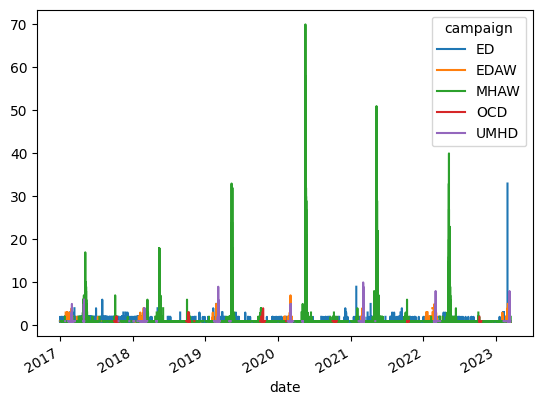

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# convert the 'date' column to a pandas datetime type
df['date'] = pd.to_datetime(df['date'])

# group the dataframe by 'group' and 'date', and count the number of tweets in each group and date
grouped = df.groupby(['campaign', 'date']).size()

# reshape the grouped data into a new dataframe
df_count = grouped.unstack('campaign')

# plot the count of tweets for each group over time
df_count.plot()
plt.show()

# Preprocessing text data - building and testing function that will be applied to all tweets eventually

In [34]:
emoji = list(UNICODE_EMOJI.keys())

In [35]:
def clean_tokens(text, language):
    # 1 create tokens
    tokens = word_tokenize(text)
    # 2 lower case
    tokens = [w.lower() for w in tokens]
    # 3 remove punctuations
    stripped = [word for word in tokens if word.isalpha()]
    # 4 remove stop_words
    stop_words = set(stopwords.words(language))
    words = [w for w in stripped if not w in stop_words]
    # remove emojis
    no_emoji = [w for w in words if not w in emoji]
    # join cleaned tokens into a single string
    clean_text = ' '.join(no_emoji)
    # return the cleaned string
    return clean_text

In [36]:
df.iloc[310814,:].tweet

'We want to spread some kindness EVERYDAY of the week in support of #MentalHealthAwarenessWeek ✨ For the chance to #WIN a Pretty Little Parcel, all you have to do is: follow us then tweet the hashtag #LovePLT 💕 and remember, be kind always 💘'

In [37]:
string_check="We want to spread some kindness EVERYDAY of the week in support of #MentalHealthAwarenessWeek ✨ For the chance to #WIN a Pretty Little Parcel, all you have to do is: follow us then tweet the hashtag #LovePLT 💕 and remember, be kind always 💘"

In [38]:
clean_tokens(string_check, 'english')
#seems to work well

'want spread kindness everyday week support mentalhealthawarenessweek chance win pretty little parcel follow us tweet hashtag loveplt remember kind always'

In [ ]:
#adding new column to store the processed tweets
#df['processed_tweet'] = df.tweet.apply(lambda x: clean_tokens(x,'english'))

In [ ]:
#after this has executed, check that it does not return the words as a list anymore, and then save to a df to replace the old
#one. Next step after this is to see if the code ChatGPT gave, for updating stopwords, works.

In [40]:
df.iloc[310814,:].tweet

'We want to spread some kindness EVERYDAY of the week in support of #MentalHealthAwarenessWeek ✨ For the chance to #WIN a Pretty Little Parcel, all you have to do is: follow us then tweet the hashtag #LovePLT 💕 and remember, be kind always 💘'

In [41]:
df.iloc[310814,:].processed_tweet

AttributeError: 'Series' object has no attribute 'processed_tweet'

In [ ]:
#df.to_csv('MH_Campaign_Tweets_Clean_1723.csv', index=False)

In [42]:
#checking that the processed tweet column is in there
df1=pd.read_csv('../datasets/MH_Campaign_Tweets_Clean_1723.csv')

In [46]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724756 entries, 0 to 724755
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ID               724756 non-null  int64  
 1   Date             724756 non-null  object 
 2   url              724756 non-null  object 
 3   username         724756 non-null  object 
 4   source           724756 non-null  object 
 5   location         724756 non-null  object 
 6   tweet            724756 non-null  object 
 7   likes            724756 non-null  int64  
 8   rt               724756 non-null  int64  
 9   followers        724756 non-null  int64  
 10  replies          724756 non-null  int64  
 11  campaign         724756 non-null  object 
 12  likes_pf         724756 non-null  float64
 13  rt_pf            724756 non-null  float64
 14  replies_pf       724756 non-null  float64
 15  engagement       724756 non-null  float64
 16  engagement_0     724756 non-null  floa